<a href="https://colab.research.google.com/github/shaival99/ShopifyDataScienceChallenge/blob/main/Shopify_Challenge_Shaival_Shah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_excel('/content/drive/MyDrive/2019 Winter Data Science Intern Challenge Data Set.xlsx', index_col=None)
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1.0,53.0,746.0,224.0,2.0,cash,2017-03-13 12:36:56.190
1,2.0,92.0,925.0,90.0,1.0,cash,2017-03-03 17:38:51.999
2,3.0,44.0,861.0,144.0,1.0,cash,2017-03-14 04:23:55.595
3,4.0,18.0,935.0,156.0,1.0,credit_card,2017-03-26 12:43:36.649
4,5.0,18.0,883.0,156.0,1.0,credit_card,2017-03-01 04:35:10.773


In [5]:
data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [6]:
data.order_amount.describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

In [7]:
data.duplicated().sum()

0

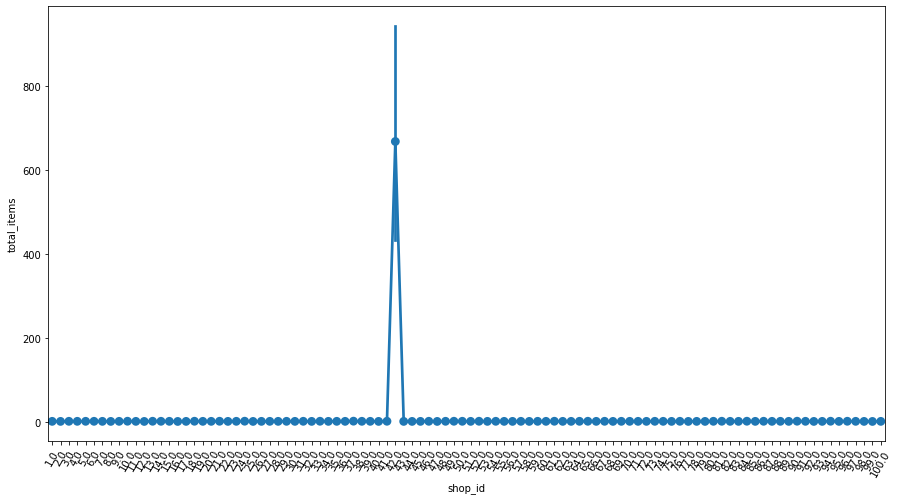

In [8]:
plt.figure(figsize = (15,8))
ax = sns.pointplot(data=data, x="shop_id", y="total_items")
plt.xticks(rotation=60)
plt.show()

####From the plot above, we can see that the shop with id=42, has sold the maximum number of items.

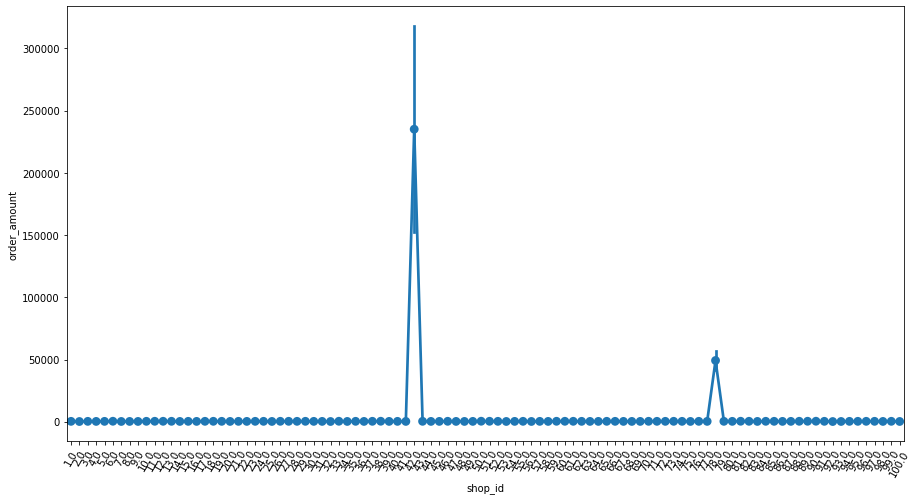

In [9]:
plt.figure(figsize = (15,8))
ax = sns.pointplot(data=data, x="shop_id", y="order_amount")
plt.xticks(rotation=60)
plt.show()

#### Seems like when we compare the shop id and the order amount, we get to know that the shops with id =42 and 78 are the anomalies, and hence we would be investigating a bit more.

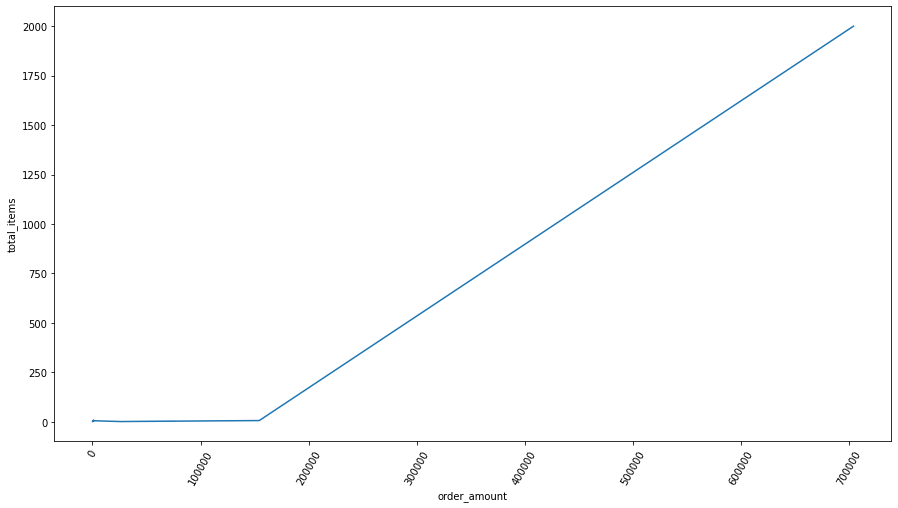

In [10]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=data, x="order_amount", y="total_items")
plt.xticks(rotation=60)
plt.show()

#### When we compare both the graphs above (i.e The one which shows relationship between order amount and total items and the one with shop id and order amount), it seems like the order with the amount of 700,000$ is the fradulent transaction.

#### Hence, we will calculate the AOV w.r.t each shop id in order to know more about the transaction which is mentioned above.

In [11]:
order_amount = data.groupby(['shop_id'])['order_amount'].agg('sum')
order_amount.name ='order_amount'
no_orders = data.groupby(['shop_id'])['total_items'].agg('sum')
no_orders.name = 'no_orders'
aov_data = pd.concat([order_amount, no_orders], axis=1)
aov = aov_data['order_amount']/aov_data['no_orders'] 
aov.name = 'aov'
aov_data = pd.concat([order_amount, no_orders , aov], axis=1) # add order_amount column in this data
aov_data

,order_amount,no_orders,aov
shop_id,,,
1.0,13588.0,86.0,158.0
2.0,9588.0,102.0,94.0
3.0,14652.0,99.0,148.0
4.0,13184.0,103.0,128.0
5.0,13064.0,92.0,142.0
...,...,...,...
96.0,16830.0,110.0,153.0
97.0,15552.0,96.0,162.0
98.0,14231.0,107.0,133.0


In [12]:
aov_data.reset_index().sort_values(['order_amount'], ascending=False).head(5)

,shop_id,order_amount,no_orders,aov
41,42.0,11990176.0,34063.0,352.0
77,78.0,2263800.0,88.0,25725.0
88,89.0,23128.0,118.0,196.0
80,81.0,22656.0,128.0,177.0
5,6.0,22627.0,121.0,187.0


#### As can be seen from the above dataframe, the shops with id = 42 and 78 have made the highest sales.

In [13]:
aov_data.describe()

,order_amount,no_orders,aov
count,1.000000e+02,100.000000,100.000000
mean,1.572564e+05,439.360000,407.990000
std,1.216218e+06,3396.366111,2557.462906
min,6.840000e+03,67.000000,90.000000
25%,1.293050e+04,88.000000,132.750000
50%,1.488750e+04,100.000000,153.000000
75%,1.760000e+04,111.250000,168.250000
max,1.199018e+07,34063.000000,25725.000000


In [14]:
data.sort_values(by=['order_amount'], ascending= False).head(5)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2153,2154.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-12 04:00:00
3332,3333.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-24 04:00:00
520,521.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-02 04:00:00
1602,1603.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-17 04:00:00
60,61.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-04 04:00:00


#### Investigating the data w.r.t the shop id = 42.

In [15]:
shop_42 = data[data['shop_id'] == 42]
shop_42.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,51.000000,51.0,51.000000,51.000000,51.000000
mean,2441.921569,42.0,758.588235,235101.490196,667.901961
std,1484.456801,0.0,125.993044,334860.641587,951.308641
min,16.000000,42.0,607.000000,352.000000,1.000000
25%,1366.500000,42.0,607.000000,352.000000,1.000000
50%,2154.000000,42.0,770.000000,704.000000,2.000000
75%,3801.000000,42.0,863.500000,704000.000000,2000.000000
max,4883.000000,42.0,975.000000,704000.000000,2000.000000


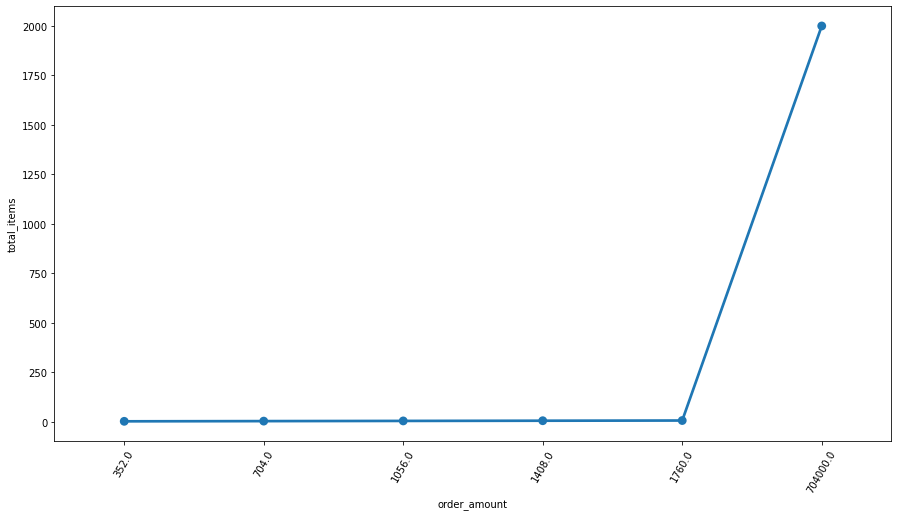

In [16]:
plt.figure(figsize = (15,8))
ax = sns.pointplot(data=shop_42, x="order_amount", y="total_items")
plt.xticks(rotation=60)
plt.show()

#### As seen in the above plot, the highest transaction made is of amount 704,000$ and the number of items is 2000. On calculating the average, we find that the average price per product would be 352\$ which seems pretty fair.

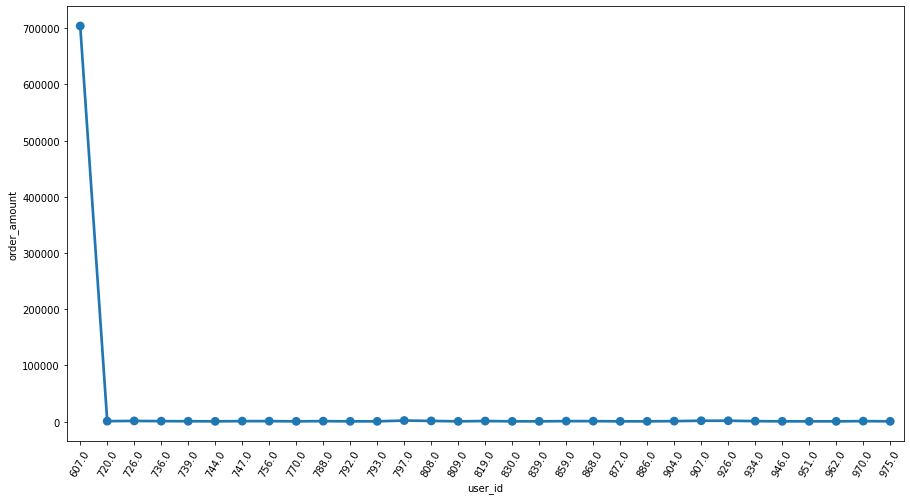

In [17]:
plt.figure(figsize = (15,8))
ax = sns.pointplot(data=shop_42, x="user_id", y="order_amount")
plt.xticks(rotation=60)
plt.show()

#### As we can see from the plot above, the user with id =607 has made an order of amount totaling 700,000$ approximately. This seems a bit untoward and hence we need to investigate this a bit further.

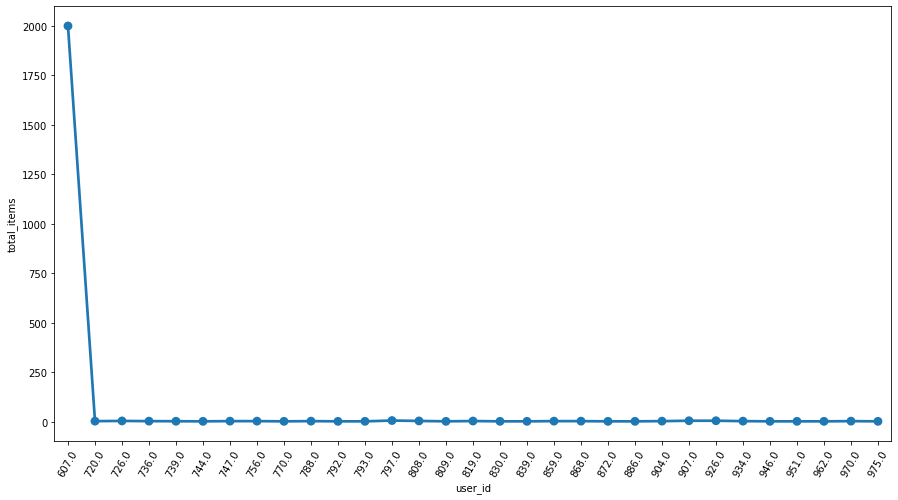

In [18]:
plt.figure(figsize = (15,8))
ax = sns.pointplot(data=shop_42, x="user_id", y="total_items")
plt.xticks(rotation=60)
plt.show()

#### Plotting the users w.r.t the total number of items they have purchased, we can see that our user(i.e. id = 607) has made an order of 2000 items, and hence the total amount now seems plausible.

#### Investigating the data w.r.t the shop id = 78.

In [19]:
shop_78 = data[data['shop_id'] == 78]
shop_78.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,46.000000,46.0,46.000000,46.000000,46.000000
mean,2663.021739,78.0,867.739130,49213.043478,1.913043
std,1338.520020,0.0,81.314871,26472.227449,1.029047
min,161.000000,78.0,707.000000,25725.000000,1.000000
25%,1428.250000,78.0,812.500000,25725.000000,1.000000
50%,2796.500000,78.0,866.500000,51450.000000,2.000000
75%,3720.250000,78.0,935.750000,51450.000000,2.000000
max,4919.000000,78.0,997.000000,154350.000000,6.000000


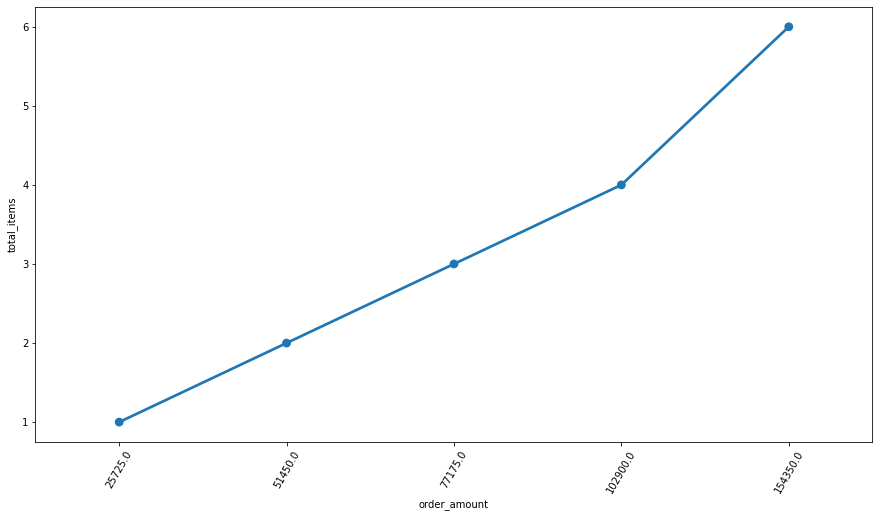

In [20]:
plt.figure(figsize = (15,8))
ax = sns.pointplot(data=shop_78, x="order_amount", y="total_items")
plt.xticks(rotation=60)
plt.show()

#### As we can see from the above plot of total order amount w.r.t the total number of items we can see that the price of 1 item is 25,725$. This seems like there is something fishy and needs thorough investigation.

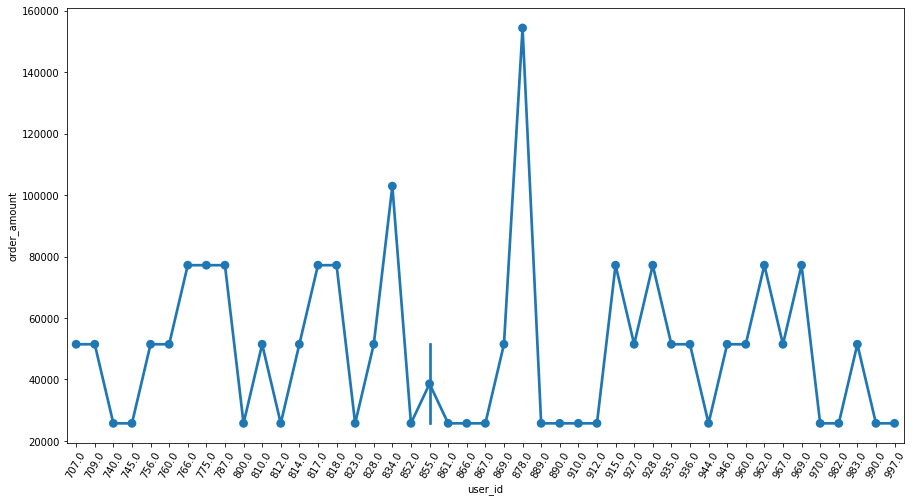

In [21]:
plt.figure(figsize = (15,8))
ax = sns.pointplot(data=shop_78, x="user_id", y="order_amount")
plt.xticks(rotation=60)
plt.show()

#### As we can see from the above plot all the users have made transactions worth more than 20,000$ which needs more study.

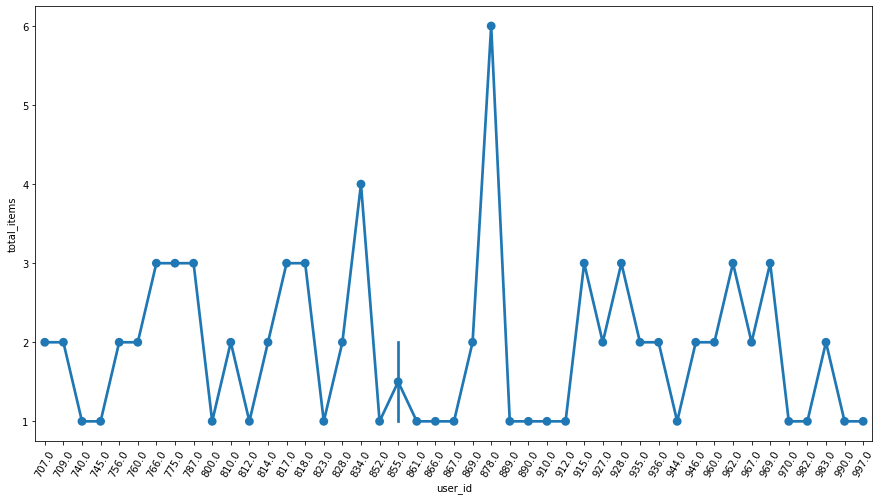

In [22]:
plt.figure(figsize = (15,8))
ax = sns.pointplot(data=shop_78, x="user_id", y="total_items")
plt.xticks(rotation=60)
plt.show()

#### The above plot which is user_id w.r.t the total number of items shows us that no user has purchased more than 6 items and mostly every user has purhcased 2 or 3 items on an average. We can assume for once that the shoes bought have a very high price and there might be some brands of sneakers that are really costly. Even though we consider this assumption, these transactions are still unreasonably high. Hence, we can drop the shop with id = 78 and calculate the AOV.

In [23]:
clean_aov = aov_data.drop([78])
clean_aov.describe()

,order_amount,no_orders,aov
count,9.900000e+01,99.000000,99.000000
mean,1.359782e+05,442.909091,152.262626
std,1.203554e+06,3413.464145,31.263719
min,6.840000e+03,67.000000,90.000000
25%,1.286700e+04,88.000000,132.500000
50%,1.483500e+04,100.000000,153.000000
75%,1.754000e+04,111.500000,167.000000
max,1.199018e+07,34063.000000,352.000000


#### After we remove the shop id =78 , we can see that the distribution is quite normal for all percentiles.

In [24]:
data.drop(data.index[data['shop_id'] == 78], inplace = True)

####AOV before removing shop id=78.

In [25]:
print("Mean AOV:",aov_data['aov'].mean())
print("Median AOV:",aov_data['aov'].median())
print("Mode AOV:",aov_data['aov'].mode()[0])

Mean AOV: 407.99
Median AOV: 153.0
Mode AOV: 153.0


####AOV after removing shop id = 78

In [26]:
print("Mean AOV:",clean_aov['aov'].mean())
print("Median AOV:",clean_aov['aov'].median())
print("Mode AOV:",clean_aov['aov'].mode()[0])

Mean AOV: 152.26262626262627
Median AOV: 153.0
Mode AOV: 153.0


**Answer(b):** 
#### As we saw from the above two cells that there is a vast difference in the mean values of AOV after we removed the anomaly. Hence, I feel that mean is not a good metric. Conversely, when we monitor the median and modes of both cases(i.e. before and after removing the anomaly), we can see that they are exactly equal. Therefore, I feel that "median" and "mode" can be taken as a metric as it does not affect the values of AOV.

**Answer(c):** 
#### The values of median and mode is 153 respectively.